<h1><b>Disease Prediction Model</b></h1>

In [99]:
import pandas as pd

In [100]:
df = pd.read_csv("./disease_symp.csv")
df.head()

,fever,cough,fatigue,headache,nausea,vomiting,chest_pain,shortness_of_breath,dizziness,joint_pain,...,rash,weight_loss,sore_throat,runny_nose,diarrhea,anxiety,depression,loss_of_taste,loss_of_smell,prognosis
0,1,1,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,Diabetes
1,1,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,Depression
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,0,Malaria
3,0,1,1,0,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,Pneumonia
4,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,Diabetes


In [101]:
#LabelEncoding

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df["prognosis"] = le.fit_transform(df["prognosis"])

class_names = le.classes_

In [102]:
#test_train_split
from sklearn.model_selection import train_test_split

x = df.drop("prognosis", axis = 1)
y = df["prognosis"]

#scaler_nomalization

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 42)


<h2>Logistic Regression</h2>

In [103]:
#model_training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)


C:\Users\solan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [104]:
#evaluation

y_pred = model.predict(x_test)
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

   Arthritis       1.00      0.99      1.00       102
      Asthma       1.00      1.00      1.00        91
    COVID-19       0.98      0.98      0.98       100
  Depression       0.99      1.00      1.00       111
    Diabetes       0.98      0.98      0.98       105
Hypertension       1.00      1.00      1.00        97
     Malaria       0.99      0.98      0.98        94
    Migraine       0.98      0.99      0.99       109
   Pneumonia       1.00      1.00      1.00       106
Tuberculosis       1.00      1.00      1.00        85

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



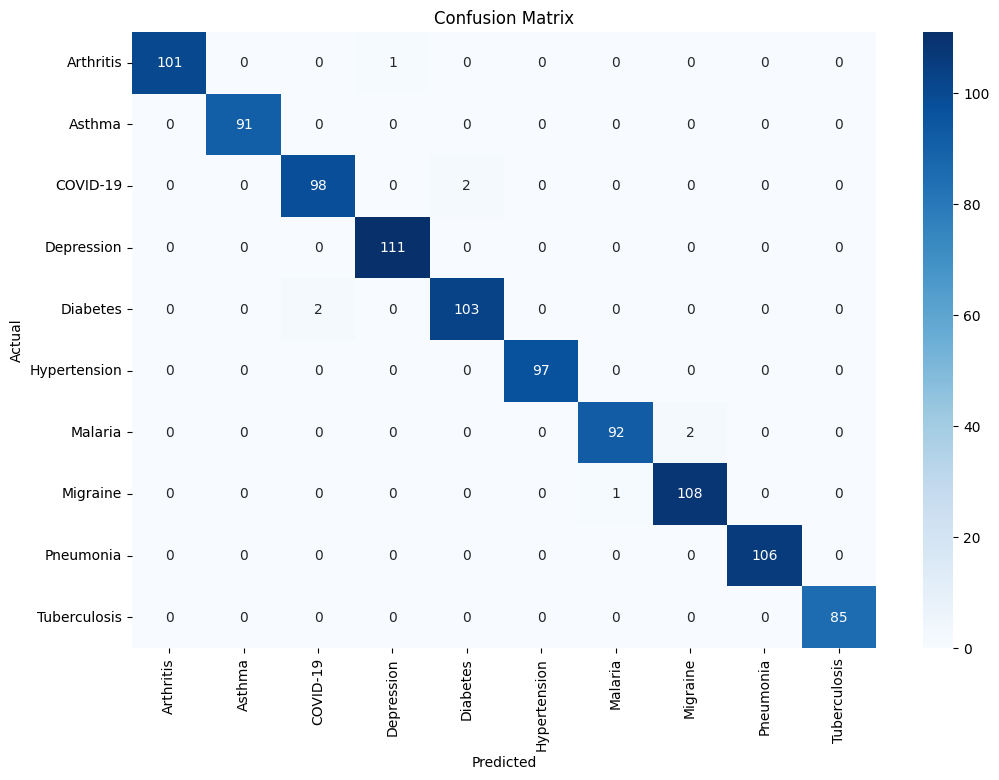

In [105]:
#ConfusionMatrix

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h2>K-Nearest Neighbout</h2>

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [109]:
y_pred_knn = knn.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.989
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      1.00      0.99        91
           2       1.00      0.96      0.98       100
           3       0.99      0.98      0.99       111
           4       0.96      1.00      0.98       105
           5       1.00      1.00      1.00        97
           6       0.98      0.99      0.98        94
           7       0.99      0.98      0.99       109
           8       0.99      1.00      1.00       106
           9       1.00      0.99      0.99        85

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[101   0   0   1   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0   0   0   0]
 [  0   0  96   0   4   0   0   0   0   0]
 [  1   1   0 109   0   0   0   0   0   0]
 [  0   0 

<h2>Random Forest</h2>

In [110]:
from sklearn.ensemble import RandomForestClassifier


In [111]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [113]:
y_pred_rf = rf_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.989
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.99      1.00      0.99        91
           2       0.98      0.98      0.98       100
           3       0.99      0.98      0.99       111
           4       0.98      0.98      0.98       105
           5       1.00      1.00      1.00        97
           6       1.00      0.98      0.99        94
           7       0.98      1.00      0.99       109
           8       0.99      1.00      1.00       106
           9       0.99      0.99      0.99        85

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[100   0   0   1   0   0   0   0   0   1]
 [  0  91   0   0   0   0   0   0   0   0]
 [  0   0  98   0   2   0   0   0   0   0]
 [  1   1   0 109   0   0   0   0   0   0]
 [  0   0 

<h2>Support Vector Machine</h2>

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
svm_model = SVC(kernel='rbf')  #we can change the kernel to "linear" or "poly" for different results

# Train the model
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      1.00      0.99        91
           2       0.99      1.00      1.00       100
           3       0.99      0.98      0.99       111
           4       1.00      0.99      1.00       105
           5       1.00      1.00      1.00        97
           6       0.99      0.98      0.98        94
           7       0.98      0.99      0.99       109
           8       0.99      1.00      1.00       106
           9       1.00      0.99      0.99        85

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[101   0   0   1   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0]
 [  1   1   0 109   0   0   0   0   0   0]
 [  0   0 

<h2>Summary</h2>

<h3>Model Accuracy</h3>
<br><b>KNN: 0.989</b></br>
<br><b>Random Forest: 0.989</b></br>
<br><b>Logistic Regression: 0.990</b></br>
<br><b>SVM: 0.992</b></br>

<h3>Insights</h3>

<h4>SVM has highest accuract</h4>
Reason: The reason for it's highest accuracy could be due to highest margin boundary which results in better generalization

<h4>All models performed excellent</h4>
Reason: low noise in data and a good preprocessing and a balanced dataset.

<h3>Visualization</h3>

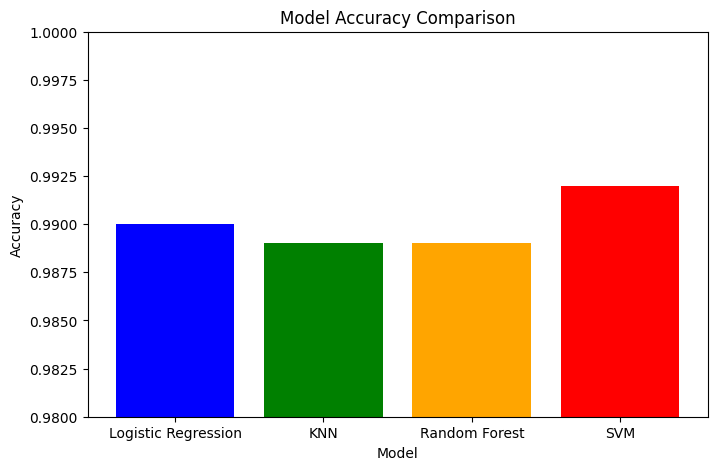

In [120]:
import matplotlib.pyplot as plt

#model accuracy
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM']
accuracies = [0.99, 0.989, 0.989, 0.992]  

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

plt.ylim([0.98, 1])  
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()
